In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import openpyxl
import numpy as np

%matplotlib inline




In [54]:
# Load the file
df = pd.read_csv('IEX_cutinase_sphero_ny.csv', delimiter=';', encoding='utf-8', header = 2)

df
# Print all available sheet names

# Rename columns for clarity
df.rename(columns={
    'ml': 'ml',
    'mAU': 'mAU',
    'ml.1': '%_ml',
    '%': '%',
    'ml.3': 'Injection',
    'ml.4': 'frac_ml',
    'Fraction': 'frac'
}, inplace=True)

df

,ml,mAU,%_ml,%,ml.2,Injection,Injection,Logbook,frac_ml,frac,ml.5,mAU.1,ml.6,mS/cm
0,-25.221535,4.861609,-25.221535,0,-0.003624,NaN,-25.221535,Method Settings,-0.000420,1.A.1,0,-0.001546,-25.221535,0.046226
1,-25.21335,4.859842,-25.139671,0,NaN,NaN,-25.221443,Equilibration,36.607201,Waste(Frac),0.008184,-0.001139,-25.205164,0.048547
2,-25.205164,4.749277,-25.057808,0,NaN,NaN,-0.029305,Sample Application,36.619003,1.A.2,0.016371,-0.000731,-25.188793,0.048207
3,-25.19698,4.759628,-24.975945,0,NaN,NaN,36.608902,Column Wash,76.617706,1.A.3,0.024555,-0.000324,-25.172424,0.047778
4,-25.188795,4.778999,-24.894081,0,NaN,NaN,86.911118,Elution,86.902802,Waste(Frac),0.03274,0.000083,-25.156054,0.047978
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46650,356.607605,9.570462,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46651,356.615784,9.568463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46652,356.623962,9.56488,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46653,356.632141,9.561786,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
# Convert to numeric, set invalid values as NaN

df['ml'] = pd.to_numeric(df['ml'], errors='coerce')  

df['mAU'] = pd.to_numeric(df['mAU'], errors='coerce')

df['%'] = pd.to_numeric(df['%'], errors='coerce')

df['frac_ml'] = pd.to_numeric(df['frac_ml'], errors='coerce')

# df['frac'] = pd.to_numeric(df['frac'], errors='coerce')
df['frac'] = df['frac'].astype(str)

df['%_ml'] = pd.to_numeric(df['%_ml'], errors='coerce')


df['ml.6'] = pd.to_numeric(df['ml.6'], errors='coerce')

df['mS/cm'] = pd.to_numeric(df['mS/cm'], errors='coerce')


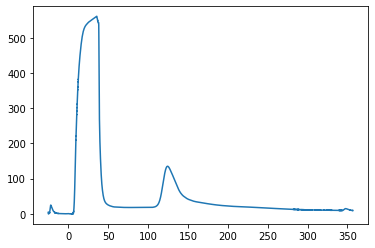

In [56]:
plt.plot(df['ml'], df['mAU'])

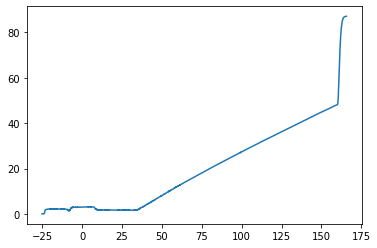

In [57]:
plt.plot(df['ml'],df['mS/cm'])

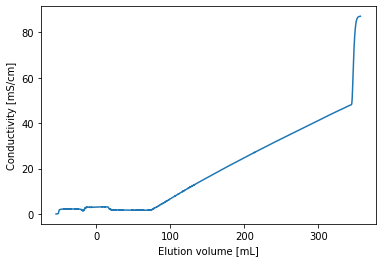

In [58]:
# for some of them, half the conductivity values are missing..? then this shifts the axis so they fit better
plt.plot(df['ml'] * 2.152, df['mS/cm'])
plt.xlabel('Elution volume [mL]')
plt.ylabel('Conductivity [mS/cm]')
plt.show()

In [59]:
 # Find the maximum value of 'ml'
max_ml = df['ml'].max()
max_ml

356.64035

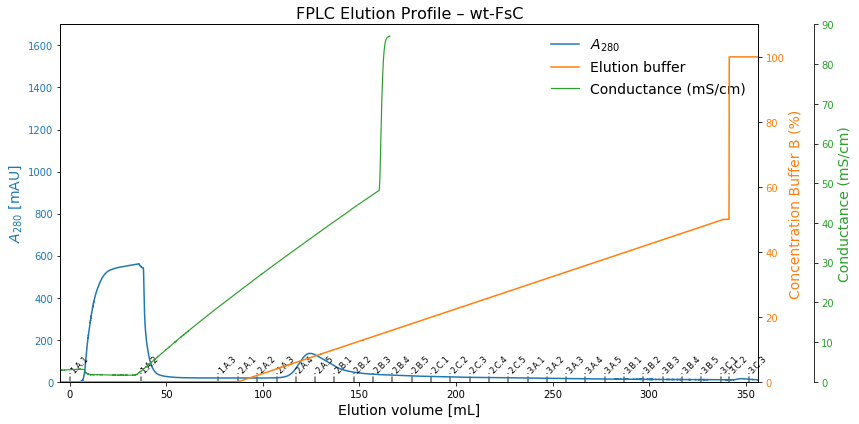

In [60]:
base_filename = ('wt-FsC')  # Extract base filename without extension ### Change for each !!!!


# Create figure and axis
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(12, 6))  
fs = 14  # Font size

# Plot UV 280
axs.plot(df['ml'], df['mAU'], color='tab:blue', label='$A_{280}$')  
axs.set_ylabel('$A_{280}$ [mAU]', fontsize=fs, color='tab:blue')
axs.tick_params(axis='y', labelcolor='tab:blue')

# Plot Elution buffer
axs02 = axs.twinx()
axs02.plot(df['%_ml'], df['%'], color='tab:orange', label='Elution buffer')
axs02.set_ylabel('Concentration Buffer B (%)', fontsize=fs, color='tab:orange')
axs02.tick_params(axis='y', labelcolor='tab:orange')
axs02.set_ylim(0, 110)

# Plot Conductivity
axs03 = axs.twinx()
axs03.spines["right"].set_position(("axes", 1.08))
axs03.plot(df['ml'] * 1, df['mS/cm'], color='tab:green', label='Conductance (mS/cm)', linewidth=1.2) #shifts the axis if nessesary by multiplying with 2.152 
axs03.set_ylabel('Conductance (mS/cm)', fontsize=fs, color='tab:green')
axs03.tick_params(axis='y', labelcolor='tab:green')
axs03.set_ylim(0, 90)

# Mark fractions
for i, j in zip(df['frac_ml'].dropna(), df['frac'].dropna()):
    if "Waste" not in j:
        axs.vlines(i, 0, 43, color='k', linestyle='--', alpha=0.6)
        axs.text(i - 0.5, 45, j, rotation=45, fontsize=8)

# Legend: Combine handles from all axes
lines1, labels1 = axs.get_legend_handles_labels()
lines2, labels2 = axs02.get_legend_handles_labels()
lines3, labels3 = axs03.get_legend_handles_labels()

axs.legend(
    lines1 + lines2 + lines3,
    labels1 + labels2 + labels3,
    loc='upper right',
    fontsize=fs,
    frameon=False
)

# Axis settings
axs.set_xlabel('Elution volume [mL]', fontsize=fs)
axs.set_ylim(0, 1700)
axs.set_xlim(-5, df['ml'].max())  

axs.set_title(f'FPLC Elution Profile – {base_filename}', fontsize=fs + 2)
fig.tight_layout()
plt.show()


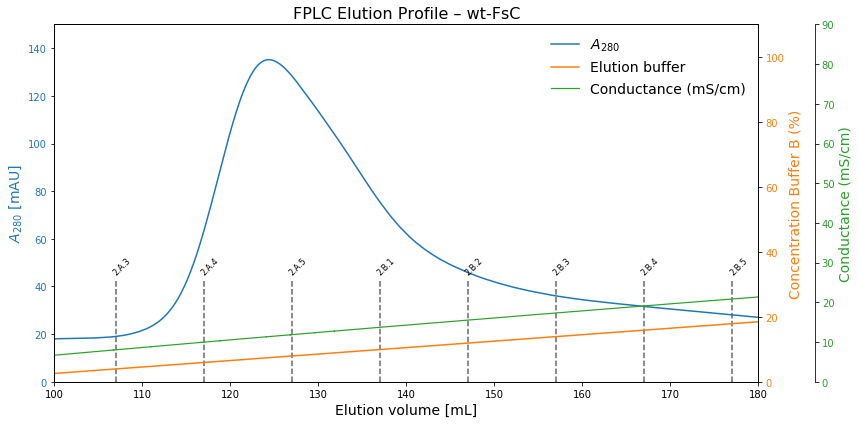

In [61]:
# Plot just a part of the graph: 



# Fix: keep fraction labels as text
df['frac'] = df['frac'].astype(str)

# Create figure and axis
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(12, 6))  
fs = 14  # Font size

# Plot UV 280
axs.plot(df['ml'], df['mAU'], color='tab:blue', label='$A_{280}$')  
axs.set_ylabel('$A_{280}$ [mAU]', fontsize=fs, color='tab:blue')
axs.tick_params(axis='y', labelcolor='tab:blue')

# Plot Elution buffer
axs02 = axs.twinx()
axs02.plot(df['%_ml'], df['%'], color='tab:orange', label='Elution buffer')
axs02.set_ylabel('Concentration Buffer B (%)', fontsize=fs, color='tab:orange')
axs02.tick_params(axis='y', labelcolor='tab:orange')
axs02.set_ylim(0, 110)

# Plot Conductivity
axs03 = axs.twinx()
axs03.spines["right"].set_position(("axes", 1.08))
axs03.plot(df['ml']*2.152, df['mS/cm'], color='tab:green', label='Conductance (mS/cm)', linewidth=1.2)
axs03.set_ylabel('Conductance (mS/cm)', fontsize=fs, color='tab:green')
axs03.tick_params(axis='y', labelcolor='tab:green')
axs03.set_ylim(0, 90)

# Mark fractions
for i, j in zip(df['frac_ml'].dropna(), df['frac'].dropna()):      
    if 100 <= i <= 180 and "Waste" not in j:        ##### change here !!!!
        axs.vlines(i, 0, 43, color='k', linestyle='--', alpha=0.6)
        axs.text(i - 0.5, 45, j, rotation=45, fontsize=8)

# Legend: Combine handles from all axes
lines1, labels1 = axs.get_legend_handles_labels()
lines2, labels2 = axs02.get_legend_handles_labels()
lines3, labels3 = axs03.get_legend_handles_labels()

axs.legend(
    lines1 + lines2 + lines3,
    labels1 + labels2 + labels3,
    loc='upper right',
    fontsize=fs,
    frameon=False
)

# Axis settings
axs.set_xlabel('Elution volume [mL]', fontsize=fs)
axs.set_ylim(0, 150)    # change here !!!!!
axs.set_xlim(100, 180)    # Change here !!!!

axs.set_title(f'FPLC Elution Profile – {base_filename}', fontsize=fs + 2)
fig.tight_layout()
plt.show()